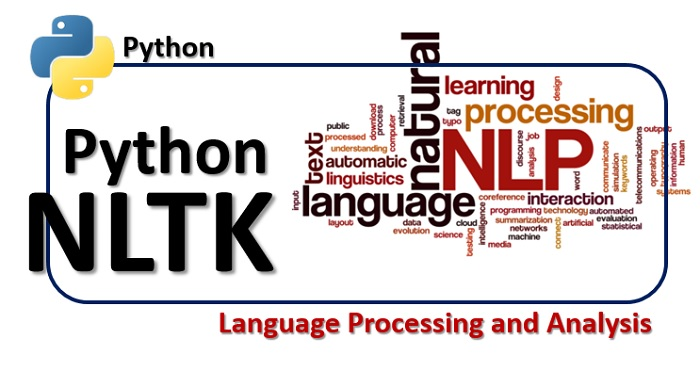

**Text to Summary from a txt file.**

***Importing necessary packages***

In [1]:
from nltk.corpus import stopwords #this is used to remove stopwords from txt file.
import nltk
from nltk.cluster.util import cosine_distance #this is used to find the distance/similarity between words
import numpy as np
import networkx as nx #this is used to Rank sentences in similarity martix

**Read Article** function takes filename as argument and returns the sentence

In [2]:
def read_article(file_name):
    file = open(file_name, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []
    for sentence in article:
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop()
    return sentences

**Sentence Similarity** function is used to find similarities between 2 sentences.

In [3]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []

    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)

    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1

    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1

    return 1 - cosine_distance(vector1, vector2)

**Build Similarity Matrix** fuction is used find Similarity between two matrixs

In [4]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2:  # ignore if both are same sentences
                continue
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

**Generate Summary** function is used to generate summary from a txt file.

In [5]:
def generate_summary(file_name, top_n=5):
    nltk.download("stopwords")
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences = read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    # print("Indexes of top ranked_sentence order are ", ranked_sentence)

    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize text
    print("Summarize Text: ", ". ".join(summarize_text))

Generating Summary from a txt file.


In [ ]:
generate_summary("/path/to/txt/file", 3) #here '3' indicates number of sentences (it gives top 3 sentences)